In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print

In [2]:
def load_data():
    data = pd.read_json('../data/instructions.jsonl', lines=True)
    return data

df = load_data()
df

,instruction,response,vietnamese,english,category,metadata
0,Dịch câu sau từ tiếng Việt sang tiếng Anh: \nT...,Who can stand you if you keep doing like that,Mày làm ăn như vậy thì ai mà chịu nổi,Who can stand you if you keep doing like that,translation,generated
1,"Cho cặp câu tiếng Việt và tiếng Anh sau, hãy c...",Đúng,Mày làm ăn như vậy thì ai mà chịu nổi,Who can stand you if you keep doing like that,classification,generated
2,"Cho cặp câu tiếng Việt và tiếng Anh sau, hãy c...",Đúng,Mày làm ăn như vậy thì ai mà chịu nổi,Who can stand you if you keep doing like that,classification,generated
3,"Cho cặp câu tiếng Việt và tiếng Anh sau, hãy c...",Đúng,Mày làm ăn như vậy thì ai mà chịu nổi,Who can stand you if you keep doing like that,classification,generated
4,Sử dụng các gợi ý căn chỉnh sau và dịch từ tiế...,Who can stand you if you keep doing like that,Mày làm ăn như vậy thì ai mà chịu nổi,Who can stand you if you keep doing like that,translation_hint,generated
...,...,...,...,...,...,...
8209,"Cho cặp câu tiếng Việt và tiếng Anh sau, hãy c...",Đúng,tôi kiên trì khắc phục vấn đề đó,i keep trying to make it work,classification,nonteencode
8210,Sử dụng các gợi ý căn chỉnh sau và dịch từ tiế...,i keep trying to make it work,tôi kiên trì khắc phục vấn đề đó,i keep trying to make it work,translation_hint,nonteencode
8211,Dịch câu sau từ tiếng Việt sang tiếng Anh: \nT...,these senior water rights are key,điểm mấu chốt ở đây là những quyền ưu tiên đó,these senior water rights are key,translation,nonteencode
8212,"Cho cặp câu tiếng Việt và tiếng Anh sau, hãy c...",Đúng,điểm mấu chốt ở đây là những quyền ưu tiên đó,these senior water rights are key,classification,nonteencode


/tmp/ipykernel_66825/4259637881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='category', data=df, palette='Set2')


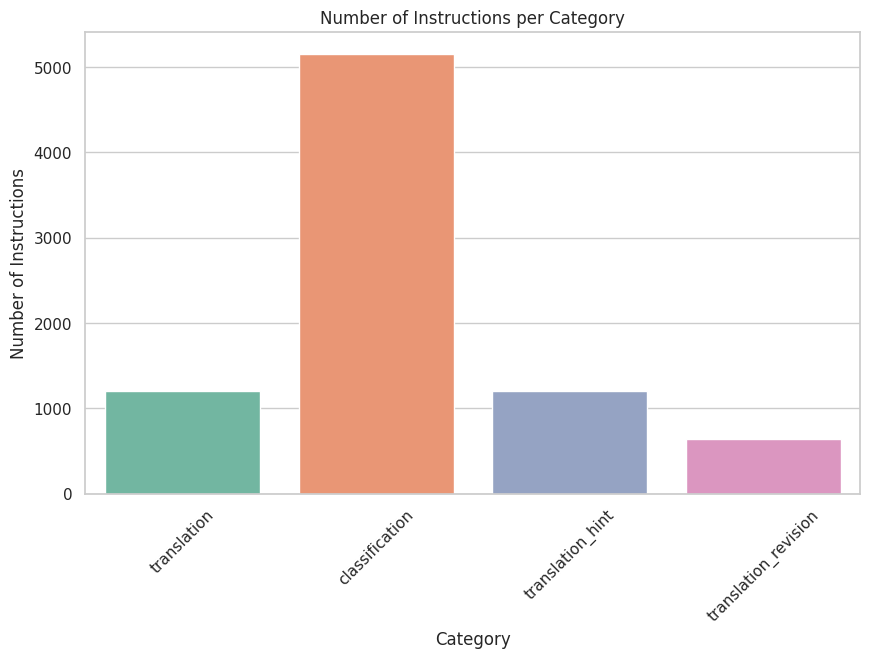

In [3]:
# make it more beautiful
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='category', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Number of Instructions per Category')
# change x-axis and y-axis labels
plt.xlabel('Category')
plt.ylabel('Number of Instructions')
plt.show()

Text(0.5, 0, 'Number of Words')

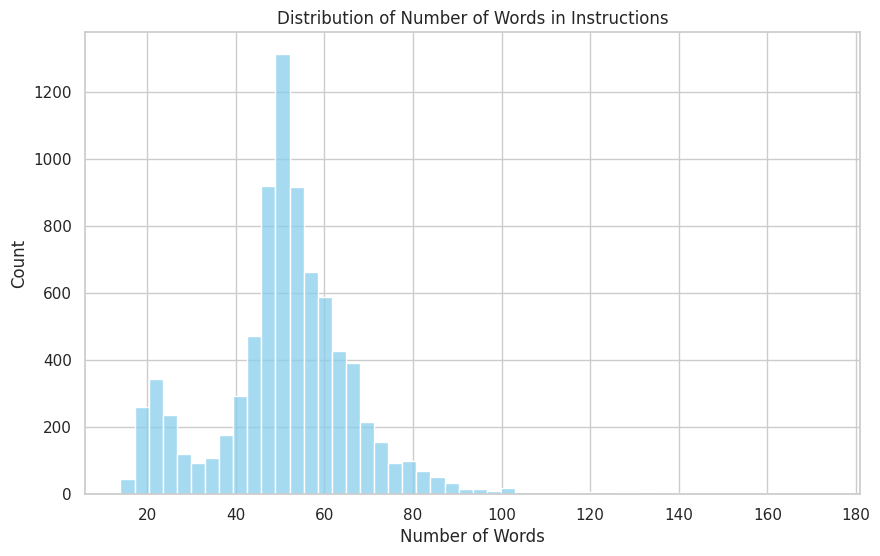

In [4]:
# visualize the distribution of the number of words in the instructions
df_num_words = df['instruction'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(df_num_words, bins=50, color='skyblue')
plt.title('Distribution of Number of Words in Instructions')
plt.xlabel('Number of Words')

/tmp/ipykernel_66825/3820996125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='metadata', data=df, palette='Set2')


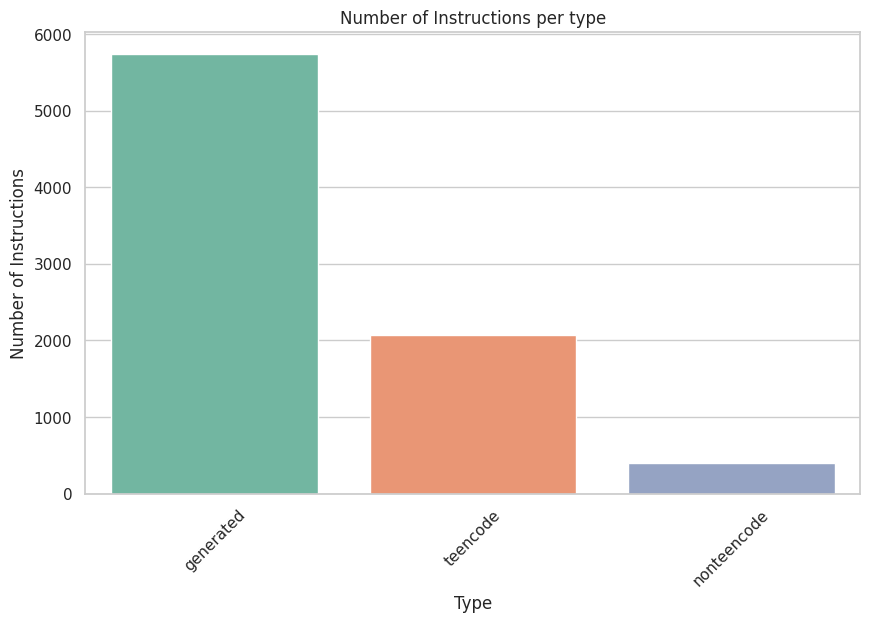

In [5]:
# visualze the number of example per metadata
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='metadata', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.title('Number of Instructions per type')
plt.xlabel('Type')
plt.ylabel('Number of Instructions')
plt.show()

/tmp/ipykernel_66825/3691374662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y=df_num_words, data=df, palette='Set2')


Text(0.5, 1.0, 'Number of Words in Instructions per Category')

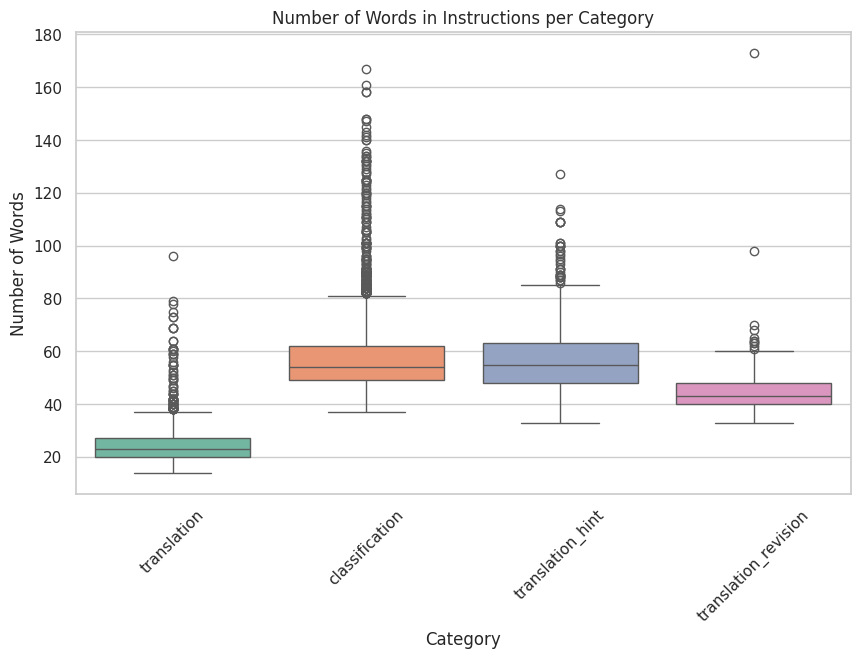

In [6]:
# visualize the distribution of the number of words in the instructions per category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y=df_num_words, data=df, palette='Set2')
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Number of Words')
plt.title('Number of Words in Instructions per Category')

Fold 1

Train: [   0    1    3 ... 8211 8212 8213], 6571

Test: [   2   10   21 ... 8193 8194 8208], 1643

/tmp/ipykernel_66825/3393019304.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df_test, palette='Set2', alpha=0.5, label='Test')


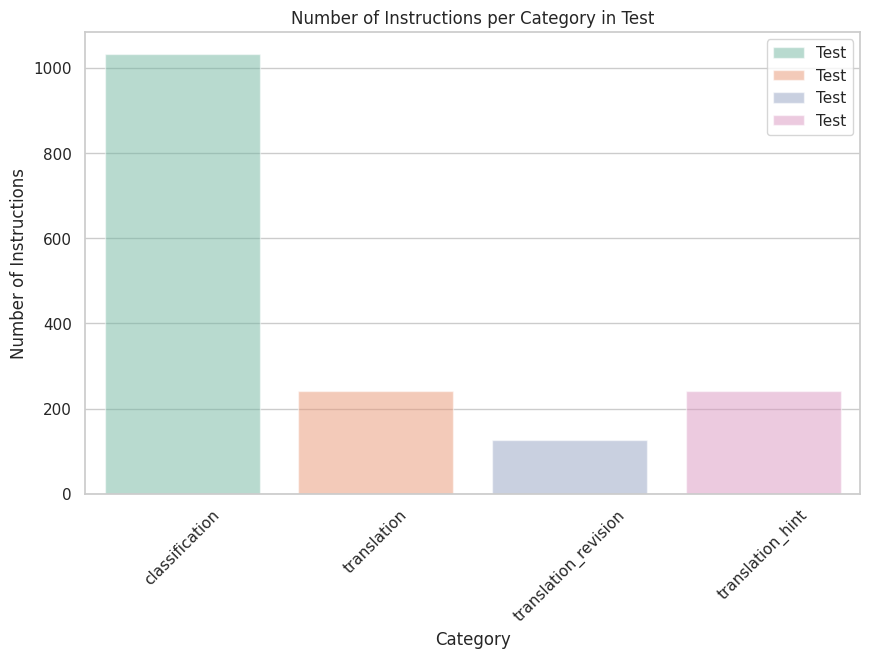

In [7]:
# train test split the dataset with 80% train and 20% test, the split should be stratified by category and metadata column

from sklearn.model_selection import StratifiedGroupKFold

def stratified_group_k_fold(X, y, groups, k, seed=42, shuffle=True):
    labels_num = y.nunique()
    skf = StratifiedGroupKFold(n_splits=k, random_state=seed, shuffle=shuffle)
    return skf.split(X, y, groups)

X = df[['instruction']]

y = df['category']

groups = df['instruction']

k = 5

for i, (train_index, test_index) in enumerate(stratified_group_k_fold(X, y, groups, k)):
    print(f'Fold {i+1}')
    print(f'Train: {train_index}, {len(train_index)}')
    print(f'Test: {test_index}, {len(test_index)}')
    print('')
    break
    
df_train = df.iloc[train_index]
df_test = df.iloc[test_index]
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df_test, palette='Set2', alpha=0.5, label='Test')
plt.xticks(rotation=45)
plt.title('Number of Instructions per Category in Test')
plt.xlabel('Category')
plt.ylabel('Number of Instructions')
plt.legend()

/tmp/ipykernel_66825/4194625063.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df_train, palette='Set2')


Text(0, 0.5, 'Number of Instructions')

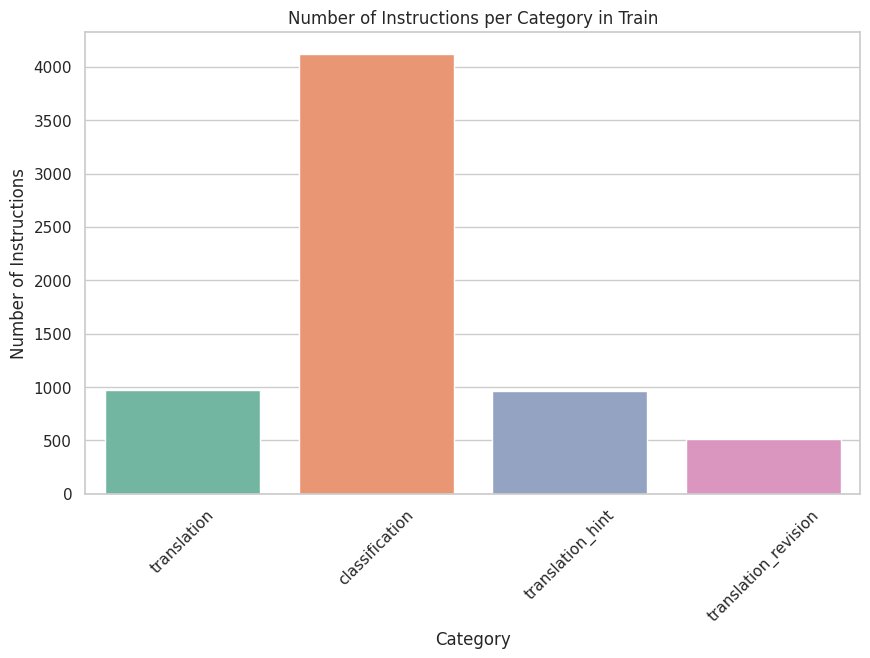

In [8]:
# visualize the distribution of the category in the train set
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df_train, palette='Set2')
plt.xticks(rotation=45)
plt.title('Number of Instructions per Category in Train')
plt.xlabel('Category')
plt.ylabel('Number of Instructions')

In [9]:
# merge the train and test set to check whether the train instruction is in the test set
df_merged = pd.merge(df_train, df_test, on='instruction', how='inner')
df_merged

,instruction,response_x,vietnamese_x,english_x,category_x,metadata_x,response_y,vietnamese_y,english_y,category_y,metadata_y


In [10]:
from datasets import Dataset, DatasetDict

# create a dataset from train and test data and save it to disk with split
train_data = Dataset.from_pandas(df_train, preserve_index=False)
test_data = Dataset.from_pandas(df_test, preserve_index=False)

dataset = DatasetDict({'train': train_data, 'test': test_data})
dataset.save_to_disk('../data/instructions')

Saving the dataset (0/1 shards):   0%|          | 0/6571 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1643 [00:00<?, ? examples/s]

In [11]:
# load the dataset from disk to check whether it is saved correctly
dataset = DatasetDict.load_from_disk('../data/instructions')
dataset

DatasetDict({
    train: Dataset({
        features: ['instruction', 'response', 'vietnamese', 'english', 'category', 'metadata'],
        num_rows: 6571
    })
    test: Dataset({
        features: ['instruction', 'response', 'vietnamese', 'english', 'category', 'metadata'],
        num_rows: 1643
    })
})

In [12]:
# print the first 5 examples in the train set and test set
for split, data in dataset.items():
    print(f'{split} set')
    print(data[:5])
    print('')


train set

{
    'instruction': [
        'Dịch câu sau từ tiếng Việt sang tiếng Anh: \nTiếng Việt: Mày làm ăn như vậy thì ai mà chịu nổi\nTiếng Anh:
',
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Mày làm ăn như vậy thì ai mà chịu nổi\nTiếng Anh: Who can stand you if you keep doing like that\nNhận định: "Mày" 
có thể được dịch là "You" ',
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Mày làm ăn như vậy thì ai mà chịu nổi\nTiếng Anh: Who can stand you if you keep doing like that\nNhận định: "ai mà 
chịu nổi" có thể được dịch là "Who can stand" ',
        'Sử dụng các gợi ý căn chỉnh sau và dịch từ tiếng Việt sang tiếng Anh\nCăn chỉnh từ tiếng Việt sang tiếng 
Anh: \n- (Mày, You)\n- (làm ăn như vậy, doing like that)\n- (ai mà chịu nổi, Who can stand)\n\nTiếng Việt: Mày làm 
ăn như vậy thì ai mà chịu nổi\nTiếng Anh: ',
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Mày làm ăn như vậy thì ai mà chịu nổi\nTiếng Anh: Who can stand you if you keep doing like that\nNhận định: "Mày" 
có thể được dịch là "Who" '
    ],
    'response': [
        'Who can stand you if you keep doing like that',
        'Đúng',
        'Đúng',
        'Who can stand you if you keep doing like that',
        'Sai'
    ],
    'vietnamese': [
        'Mày làm ăn như vậy thì ai mà chịu nổi',
        'Mày làm ăn như vậy thì ai mà chịu nổi',
        'Mày làm ăn như vậy thì ai mà chịu nổi',
        'Mày làm ăn như vậy thì ai mà chịu nổi',
        'Mày làm ăn như vậy thì ai mà chịu nổi'
    ],
    'english': [
        'Who can stand you if you keep doing like that',
        'Who can stand you if you keep doing like that',
        'Who can stand you if you keep doing like that',
        'Who can stand you if you keep doing like that',
        'Who can stand you if you keep doing like that'
    ],
    'category': ['translation', 'classification', 'classification', 'translation_hint', 'classification'],
    'metadata': ['generated', 'generated', 'generated', 'generated', 'generated']
}

test set

{
    'instruction': [
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Mày làm ăn như vậy thì ai mà chịu nổi\nTiếng Anh: Who can stand you if you keep doing like that\nNhận định: "làm ăn
như vậy" có thể được dịch là "doing like that" ',
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Mày làm ơn đi, tao chán mày lắm rồi\nTiếng Anh: Please, I\'m so fed up with you\nNhận định: "làm ơn đi" có thể được
dịch là "Please" ',
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Bữa nay tao chả muốn nói chuyện với mày\nTiếng Anh: I don\'t feel like talking to you today\nNhận định: "Bữa nay" 
có thể được dịch là "talking" ',
        'Cho cặp câu tiếng Việt và tiếng Anh sau, hãy cho biết nhận định sau đây có đúng hay không:\nTiếng Việt: 
Tao chả hỉu mày đang nói gì hết trơn\nTiếng Anh: I have no idea what you\'re talking about\nNhận định: "chả hỉu" có
thể được dịch là "I" ',
        'Dịch câu sau từ tiếng Việt sang tiếng Anh: \nTiếng Việt: Mày có nhớ lúc tao cứu mày khỏi bọn nó 
không?\nTiếng Anh: '
    ],
    'response': ['Đúng', 'Đúng', 'Sai', 'Sai', 'Do you remember when I saved you from them?'],
    'vietnamese': [
        'Mày làm ăn như vậy thì ai mà chịu nổi',
        'Mày làm ơn đi, tao chán mày lắm rồi',
        'Bữa nay tao chả muốn nói chuyện với mày',
        'Tao chả hỉu mày đang nói gì hết trơn',
        'Mày có nhớ lúc tao cứu mày khỏi bọn nó không?'
    ],
    'english': [
        'Who can stand you if you keep doing like that',
        "Please, I'm so fed up with you",
        "I don't feel like talking to you today",
        "I have no idea what you're talking about",
        'Do you remember when I saved you from them?'
    ],
    'category': ['classification', 'classification', 'classification', 'classification', 'translation'],
    'metadata': ['generated', 'generated', 'generated', 'generated', 'generated']
}